#fuentes de referencia
* https://www.epdata.es/datos/mortalidad-estimada-registrada-cualquier-causa-coincidiendo-epidemia-coronavirus/521/espana/106
* https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html
* https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
path_momo='https://momo.isciii.es/public/momo/data'

In [5]:
row_momo = pd.read_csv(path_momo)

In [6]:
row_momo

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-11-11,1120,1120.00000,1120.000000,1058.50,970.65,1141.725
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-11-12,1090,1090.00000,1090.000000,1058.50,977.50,1141.725
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-11-13,1139,1139.00000,1139.000000,1072.75,983.65,1141.725
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-11-14,1044,1044.00000,1044.000000,1072.75,975.25,1155.000
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-11-15,1102,1102.00000,1102.000000,1073.75,975.25,1184.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-11-24,0,0.00000,0.245214,0.00,0.00,2.000
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-11-25,0,0.00000,0.231778,0.00,0.00,2.000
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-11-26,0,0.00000,0.453490,0.00,0.00,2.000
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-11-27,1,0.36787,1.810097,0.00,0.00,2.000


In [16]:
row_momo.columns

Index(['ambito', 'cod_ambito', 'cod_ine_ambito', 'nombre_ambito', 'cod_sexo',
       'nombre_sexo', 'cod_gedad', 'nombre_gedad', 'fecha_defuncion',
       'defunciones_observadas', 'defunciones_observadas_lim_inf',
       'defunciones_observadas_lim_sup', 'defunciones_esperadas',
       'defunciones_esperadas_q01', 'defunciones_esperadas_q99'],
      dtype='object')

In [17]:
row_momo['cod_ambito'].unique()

array([nan, 'AN', 'AR', 'AS', 'IB', 'CN', 'CB', 'CL', 'CM', 'CT', 'VC',
       'EX', 'GA', 'MD', 'MC', 'NC', 'PV', 'RI', 'CE', 'ML'], dtype=object)

In [ ]:
provincias_interes=['cod_ambito','nombre_ambito', 'cod_sexo',
       'nombre_sexo', 'cod_gedad', 'nombre_gedad', 'fecha_defuncion',
       'defunciones_observadas', 'defunciones_observadas_lim_inf',
       'defunciones_observadas_lim_sup', 'defunciones_esperadas',
       'defunciones_esperadas_q01', 'defunciones_esperadas_q99']

In [12]:
row_momo1=row_momo.loc[(row_momo['ambito']=='ccaa') & (row_momo['cod_sexo']=='all') \
                       & (row_momo['cod_gedad']=='all')]

In [13]:
row_momo1

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
8988,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2018-11-11,216,216.000000,216.000000,184.0,152.90,210.80
8989,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2018-11-12,210,210.000000,210.000000,187.0,152.90,214.80
8990,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2018-11-13,171,171.000000,171.000000,187.0,161.55,214.80
8991,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2018-11-14,203,203.000000,203.000000,186.0,161.00,214.80
8992,ccaa,AN,1.0,Andalucía,all,todos,all,todos,2018-11-15,173,173.000000,173.000000,186.0,161.55,214.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171516,ccaa,ML,19.0,Melilla,all,todos,all,todos,2020-11-24,1,1.000000,1.332452,1.0,0.00,4.31
171517,ccaa,ML,19.0,Melilla,all,todos,all,todos,2020-11-25,1,1.000000,2.557076,1.0,0.00,3.31
171518,ccaa,ML,19.0,Melilla,all,todos,all,todos,2020-11-26,5,4.213181,6.104546,1.0,0.00,4.31
171519,ccaa,ML,19.0,Melilla,all,todos,all,todos,2020-11-27,2,0.000000,3.681024,1.0,0.00,4.31


In [20]:
momo_ccaa=row_momo.groupby(['fecha_defuncion','cod_ambito']).sum().reset_index()

In [21]:
momo_ccaa

,fecha_defuncion,cod_ambito,cod_ine_ambito,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,2018-11-11,AN,12.0,864,864.000000,864.000000,731.5,563.375,899.350
1,2018-11-11,AR,24.0,112,112.000000,112.000000,118.0,55.750,197.575
2,2018-11-11,AS,36.0,160,160.000000,160.000000,135.0,62.300,232.850
3,2018-11-11,CB,72.0,44,44.000000,44.000000,50.5,19.200,100.575
4,2018-11-11,CE,216.0,8,8.000000,8.000000,2.0,0.000,23.250
...,...,...,...,...,...,...,...,...,...
14226,2020-11-28,ML,228.0,4,0.664390,19.912973,1.0,0.000,25.860
14227,2020-11-28,NC,180.0,55,17.480222,94.637827,57.0,17.450,107.410
14228,2020-11-28,PV,192.0,218,128.153718,308.524143,233.5,151.110,321.410
14229,2020-11-28,RI,204.0,27,2.181044,55.873561,22.0,4.690,65.170


In [27]:
momo_ccaa.set_index(['fecha_defuncion'],inplace=True)

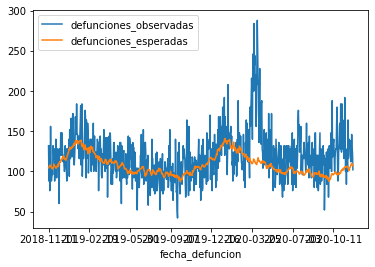

In [30]:
momo_ccaa.loc[momo_ccaa['cod_ambito']=='EX',['defunciones_observadas','defunciones_esperadas']].plot()